# Choosing the number of cores

If choosing to run your simulation in parallel, the maximum number of cores may not be the most efficient. This notebook examines the run time for the model with varying numbers of cores.

The run time is provided at the end of the notebook.

Credit:

* Code for running the model with a varying number of CPU cores was adapted from Sammi Rosser and Dan Chalk (2024) [HSMA - the little book of DES](https://github.com/hsma-programme/hsma6_des_book) (MIT Licence).

## Set-up

Load required packages.

In [1]:
# pylint: disable=missing-module-docstring
# To ensure any updates to `simulation/` are fetched without needing to restart
# the notebook environment, reload `simulation/` before execution of each cell
%load_ext autoreload
%autoreload 1
%aimport simulation

In [2]:
# pylint: disable=wrong-import-position
import os
import time

import pandas as pd
import plotly.express as px
import plotly.io as pio

from simulation.model import Param, Runner

Display plotly express figures as non-interactive figures. This means they will be visible when browsing the notebooks on GitHub. To switch these back to interactive figures, simply remove this line.

In [3]:
pio.renderers.default = 'svg'

Start timer.

In [4]:
notebook_start_time = time.time()

Define path to outputs folder

In [5]:
# pylint: disable=duplicate-code
OUTPUT_DIR = '../outputs/'

## Run time with varying number of CPU cores

These are rounded to the nearest .5 seconds, as we will see minor differences in run time between re-runs of this notebook on the same machine, so rounding prevents the figure from changing with every run!

Running with cores: 1.


Running with cores: 2.


Running with cores: 3.


Running with cores: 4.


Running with cores: 5.


Running with cores: 6.


Running with cores: 7.


Running with cores: 8.


   cores  run_time
0      1       7.0
1      2       4.5
2      3       3.5
3      4       3.0
4      5       2.5
5      6       2.5
6      7       2.0
7      8       1.5


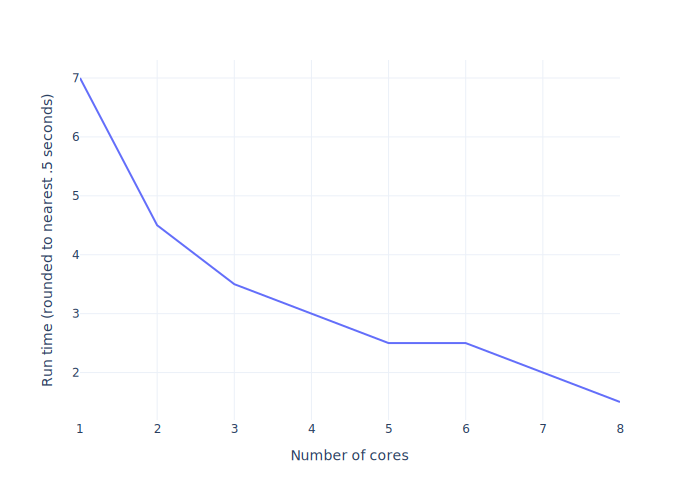

In [6]:
# Run with 1 to 8 cores
speed = []
for i in range(1, 9):
    print(f'Running with cores: {i}.')
    start_time = time.time()

    run_param = Param(cores=i)
    experiment = Runner(run_param)
    experiment.run_reps()

    # Round time to nearest .5 seconds
    run_time = round((time.time() - start_time)*2)/2
    speed.append({'cores': i, 'run_time': run_time})

# Plot time by number of cores
timing_results = pd.DataFrame(speed)
print(timing_results)
cores_fig = px.line(timing_results, x='cores', y='run_time')
cores_fig.update_layout(
    xaxis_title='Number of cores',
    yaxis_title='Run time (rounded to nearest .5 seconds)',
    template='plotly_white'
)

# Display and save figure
cores_fig.show()
cores_fig.write_image(os.path.join(OUTPUT_DIR, 'choose_param_cores.png'),
                      width=800, height=600)

## Run time

In [7]:
# Get run time in seconds
notebook_end_time = time.time()
runtime = round(notebook_end_time - notebook_start_time)

# Display converted to minutes and seconds
print(f'Notebook run time: {runtime // 60}m {runtime % 60}s')

Notebook run time: 0m 27s
